In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
%matplotlib inline

In [67]:
golf = pd.read_csv("2013 raw pgatour data.csv")

C:\Users\Ariq\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (20,21,22,27,33,34,35,39,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [68]:
golf.head()

,Tour Code,Tour Description,Year,Tourn.#,Player #,Course #,Permanent Tournament #,Player First Name,Player Last Name,Round,...,X Coordinate,Y Coordinate,Z Coordinate,Distance from Center,Distance from Edge,Date,Left/Right,Strokes Gained/Baseline,Strokes Gained Category,Recovery Shot
0,R,PGA TOUR,2013,10,6527,656,16,Steve,Stricker,1,...,"7,192.85","12,105.93",207.555,259,25,1/7/2013,R,0.498,Off the Tee,No
1,R,PGA TOUR,2013,10,6527,656,16,Steve,Stricker,1,...,"6,683.56","12,133.54",184.413,69,258,1/7/2013,R,-0.295,Approach to the Green,No
2,R,PGA TOUR,2013,10,6527,656,16,Steve,Stricker,1,...,"6,738.09","12,132.13",183.455,6,255,1/7/2013,R,-0.232,Putting,No
3,R,PGA TOUR,2013,10,6527,656,16,Steve,Stricker,1,...,0,0,0,0,0,1/7/2013,NaN,0.459,Putting,No
4,R,PGA TOUR,2013,10,6527,656,16,Steve,Stricker,1,...,"6,031.29","11,570.16",186.144,188,123,1/7/2013,L,-0.073,Approach to the Green,No


In [69]:
golf.dtypes

Tour Code                            object
 Tour Description                    object
 Year                                 int64
 Tourn.#                              int64
 Player #                             int64
 Course #                             int64
 Permanent Tournament #               int64
 Player First Name                   object
 Player Last Name                    object
 Round                                int64
 Tournament Name                     object
Course Name                          object
 Hole                                 int64
 Hole Score                           int64
 Par Value                            int64
 Yardage                              int64
  Shot                                int64
 Shot Type(S/P/D)                    object
# of Strokes                          int64
 From Location(Scorer)               object
 From Location(Enhanced)             object
 To Location(Scorer)                 object
 To Location(Enhanced)          

In [84]:
golf_sub = golf.iloc[0:10000,:]
two_var_cluster = golf_sub.iloc[:,[13,14,15]]

two_var_cluster.tail(10)

,Hole Score,Par Value,Yardage
9990,3,3,176
9991,3,3,176
9992,3,4,454
9993,3,4,454
9994,3,4,454
9995,5,5,506
9996,5,5,506
9997,5,5,506
9998,5,5,506
9999,5,5,506


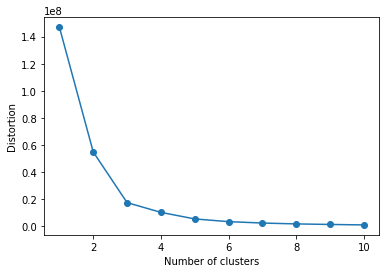

In [71]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(two_var_cluster)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

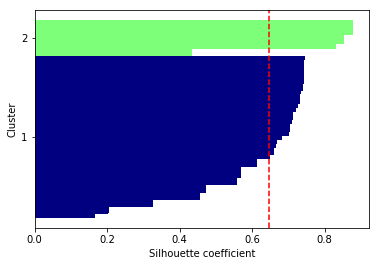

In [73]:
km = KMeans(n_clusters=2, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(two_var_cluster)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(two_var_cluster, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor='none',
        color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

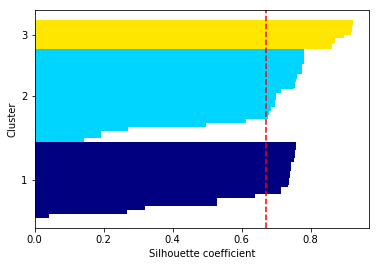

In [72]:
km = KMeans(n_clusters=3, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(two_var_cluster)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(two_var_cluster, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor='none',
        color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

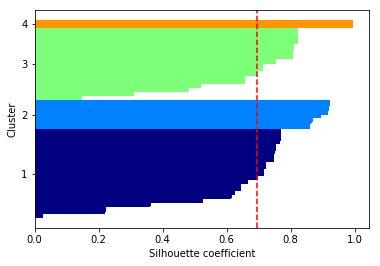

In [74]:
km = KMeans(n_clusters=4, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(two_var_cluster)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(two_var_cluster, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor='none',
        color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

C:\Users\Ariq\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Ariq\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


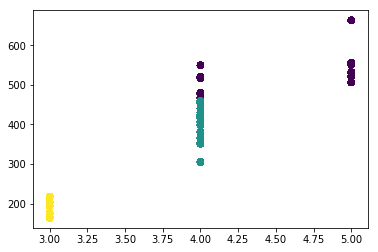

In [85]:
k_means = KMeans(n_clusters=3, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
kmeans = k_means.fit(two_var_cluster)
labels = kmeans.predict(two_var_cluster)

golf_sub['cluster'] = labels
two_var_cluster['cluster'] = labels

plt.scatter(golf_sub.iloc[:, 14], golf_sub.iloc[:, 15], c= golf_sub["cluster"])

C:\Users\Ariq\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


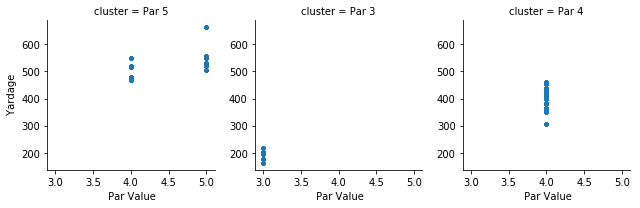

In [86]:
golf_sub.loc[golf_sub.cluster == 0, 'cluster'] = 'Par 5'
golf_sub.loc[golf_sub.cluster == 1, 'cluster'] = 'Par 4'
golf_sub.loc[golf_sub.cluster == 2, 'cluster'] = 'Par 3'

golf_sub.head()

golf_sub['cluster'].replace({0: 'Par 5', 1: 'Par 4', 2: 'Par 3'})
facetplot = sns.FacetGrid(golf_sub, col="cluster")
facetplot = facetplot.map(plt.scatter, " Par Value", " Yardage", marker=".")